In [1]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from datetime import datetime, timezone
from time import time, ctime, struct_time, gmtime

import os

import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

#https://stackoverflow.com/questions/18195758/set-matplotlib-colorbar-size-to-match-graph
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [2]:
def get_config():
    
    datadir = "../data/daily"
    plotdir = "./scratch"
    cdict = {}
    cdict['datadir'] = datadir
    cdict['plotdir'] = plotdir
    cdict['cm_def'] = np.linspace(0, 300, 41, endpoint=True)
    cdict['cticks'] = [0, 150, 300]
    cdict['cb_fraction'] = 0.038
    cdict['cb_pad'] = 0.05
    cdict['cmap'] = 'gist_ncar_r'
    
    return cdict

In [3]:
def xmain(fpath):
    #gtdir = '/raid/gkroiz1/gtDays'
    #gtfile = gtdir + '/' + '08-14-2005-gt.npy'
    #gtfile = gtdir + '/' + 't-194-64-08-17-2005-gt.npy'
    
    print("[fpath] ", fpath)
    x = np.load(fpath)
    print( x.shape )
    print ("min = ", np.min(x))
    print ("max = ", np.max(x))


    xmean = np.squeeze( np.mean(x, axis=0) )
    print( xmean.shape )
    print ("min = ", np.min(xmean))
    print ("max = ", np.max(xmean))
    return

In [4]:
"""
https://matplotlib.org/stable/tutorials/colors/colormap-manipulation.html
"""
ncolors = 64
jet = cm.get_cmap('jet', ncolors)
newcolors = jet(np.linspace(0, 1, ncolors))
white = np.array([1., 1., 1., 1])
gray128 = np.array([.5, .5, .5, 1])
newcolors[:1, :] = gray128
newcmap = ListedColormap(newcolors)

[gt] shape =  (288, 64, 64)
[gt] min =  0.0
[gt] max =  227.9
[gt] mean =  1.927306
[gtmean] shape =  (64, 64)
5.0083327
223.11667
46.255337
[xdata] min =  0.0
[xdata] max =  129.9
[xdata] mean =  7.5130863
[xdata]  (64, 64)


Text(1.0, 1.0, '08-14-2005')

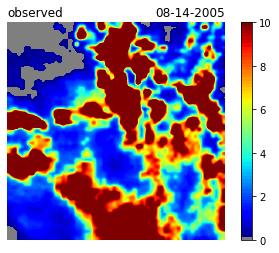

In [11]:
dtstr = '08-14-2005'

gtdir = '/raid/gkroiz1/gtDaysComplex'
gtfile = gtdir + '/' + 't-194-64-' + dtstr + '-gt.npy'
gt = np.load(gtfile)
print("[gt] shape = ", gt.shape )
print("[gt] min = ", np.min( gt.flatten() ))
print("[gt] max = ", np.max( gt.flatten() ))
print("[gt] mean = ", np.mean( gt.flatten() ))

gtmean = np.mean(gt, axis=0) * 24
print("[gtmean] shape = ", gtmean.shape )
print(np.min( gtmean.flatten() ))
print(np.max( gtmean.flatten() ))
print(np.mean( gtmean.flatten() ))

xdata = gt[200,:,:]
print("[xdata] min = ", np.min( xdata.flatten() ))
print("[xdata] max = ", np.max( xdata.flatten() ))
print("[xdata] mean = ", np.mean( xdata.flatten() ))
print("[xdata] ", xdata.shape)
gtplot = plt.imshow(xdata, interpolation='gaussian', cmap=newcmap)
plt.axis('off')
gtplot.set_clim(0.,10) 
plt.colorbar()
plt.title('observed', loc='left')
plt.title(dtstr, loc='right')

[pred]  /raid/gkroiz1/predDaysComplex/t-194-64-08-14-2005-pred.npy
[pred] shape =  (288, 64, 64)
[predmean] shape =  (64, 64)
19.439474
56.700783
30.71592
[xdata] min =  0.62526536
[xdata] max =  7.4143014
[xdata] mean =  2.7184715
[xdata]  (64, 64)


Text(1.0, 1.0, '08-14-2005')

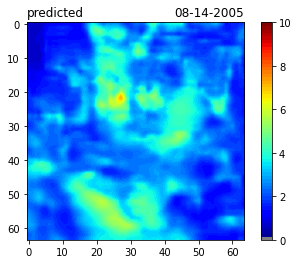

In [10]:
pdir = '/raid/gkroiz1/predDaysComplex' 
pfile = pdir + '/' + 't-194-64-' + dtstr + '-pred.npy'
print("[pred] ", pfile)
pred = np.load(pfile) 
print("[pred] shape = ", pred.shape )
predmean = np.mean(pred, axis=0) * 24
print("[predmean] shape = ", predmean.shape ) 
print(np.min(predmean.flatten())) 
print(np.max(predmean.flatten())) 
print(np.mean(predmean.flatten()))

xdata = pred[200,:,:]
print("[xdata] min = ", np.min( xdata.flatten() ))
print("[xdata] max = ", np.max( xdata.flatten() ))
print("[xdata] mean = ", np.mean( xdata.flatten() ))
print("[xdata] ", xdata.shape)
pred_plot = plt.imshow(xdata, interpolation='gaussian', cmap=newcmap) 
pred_plot.set_clim(0.,10) 
plt.colorbar() 
plt.title('predicted', loc='left')
plt.title(dtstr, loc='right')

In [ ]:
if __name__ == "__main__":
    dtstr = '08-16-2005'
    gtdir = '/raid/gkroiz1/gtDaysComplex'
    gtfile = gtdir + '/' + 't-194-64-' + dtstr + '-gt.npy'
    xmain(gtfile)
    
    pdir = '/raid/gkroiz1/predDaysComplex' 
    pfile = pdir + '/' + 't-194-64-' + dtstr + '-pred.npy'
    xmain(pfile)
